In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import ast
from mpl_toolkits import mplot3d
import math
import timeit
%matplotlib widget

In [2]:
hand_scores = [1,2,3,4,5,7,8] #Ignores flush, straight flush, royal flush

redraw_combs={} #index replacement list, comb list index for ease of use
redraw_combs_rev = {}
count = 0
for i in range(6):
    test = list(itertools.combinations([0,1,2,3,4],i))
    for j,val in enumerate(test):
        redraw_combs[val] = count
        redraw_combs_rev[count] = val
        count += 1

In [3]:
score_test_dict = {1:"None",
                   2:"Pair",
                   3:"Two Pair",
                   4:"Three of a Kind",
                   5:"Straight",
                   6:"Flush",
                   7:"Fullhouse",
                   8:"Four of a Kind"}

In [4]:
card_label_dict = {1:["High Card","2nd Highest","3rd Highest","4th Highest","Lowest"],
                  2:["Pair","Pair","High Card","2nd Highest","Lowest"],
                  3:["Pair1","Pair1","Pair2","Pair2","High Card"],
                  4:["Three","Three","Three","High Card","Lowest"],
                  5:["Straight Highest","2nd Highest","3rd Highest","4th Highest","Lowest"],
                  6:["High Card","2nd Highest","3rd Highest","4th Highest","Lowest"],
                  7:["House Triple","House Triple","House Triple","House Pair","House Pair"],
                  8:["Four","Four","Four","Four","High Card"]}

In [5]:
df = pd.read_csv("Hand Winrates.csv")
hand_card_values = [[],[],[],[],[]]
for i in range(len(df)):
    aa = ast.literal_eval(df["Hand List"].iloc[i])
    for i in range(5):
        hand_card_values[i].append(aa[i])
for i in range(5):
    s = "Card "+str(i+1)
    df[s] = hand_card_values[i]
hands = pd.unique(df["Hand List"])

In [6]:
uniques = pd.unique(df["Hand List"]) #Get the unique hand entries
redraw_index = []
for row in range(len(df.index)):
    redraw_index.append(redraw_combs[tuple(ast.literal_eval(df["Index Remove"][row]))]) #Convert removal list into removal index and add in
df["Redraw Index"] = redraw_index

In [7]:
#Making df of only best redrawing per hand
df_max = pd.read_csv("Best Winrates.csv")
hand_card_values = [[],[],[],[],[]]
for i in range(len(df_max)):
    aa = ast.literal_eval(df_max["Hand List"].iloc[i])
    for i in range(5):
        hand_card_values[i].append(aa[i])
for i in range(5):
    s = "Card "+str(i+1)
    df_max[s] = hand_card_values[i]

# Overall plots

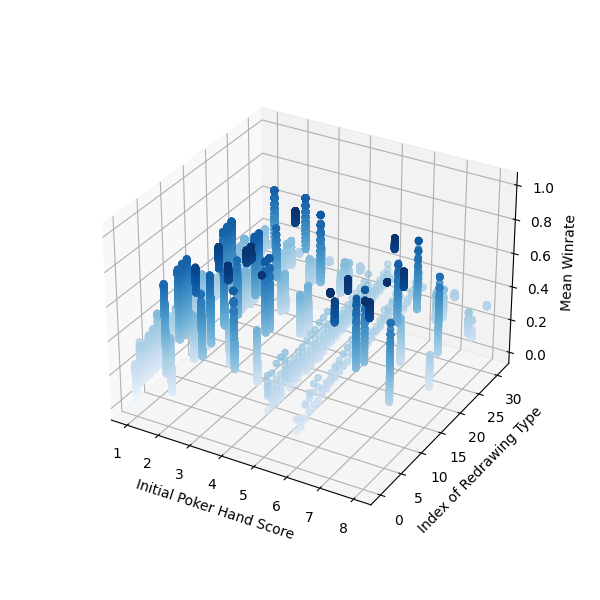

In [8]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(df["Hand Score"],df["Redraw Index"],df["Winrate"], c=df["Winrate"],cmap='Blues')
ax.set_xlabel('Initial Poker Hand Score')
ax.set_ylabel('Index of Redrawing Type')
ax.set_zlabel('Mean Winrate');

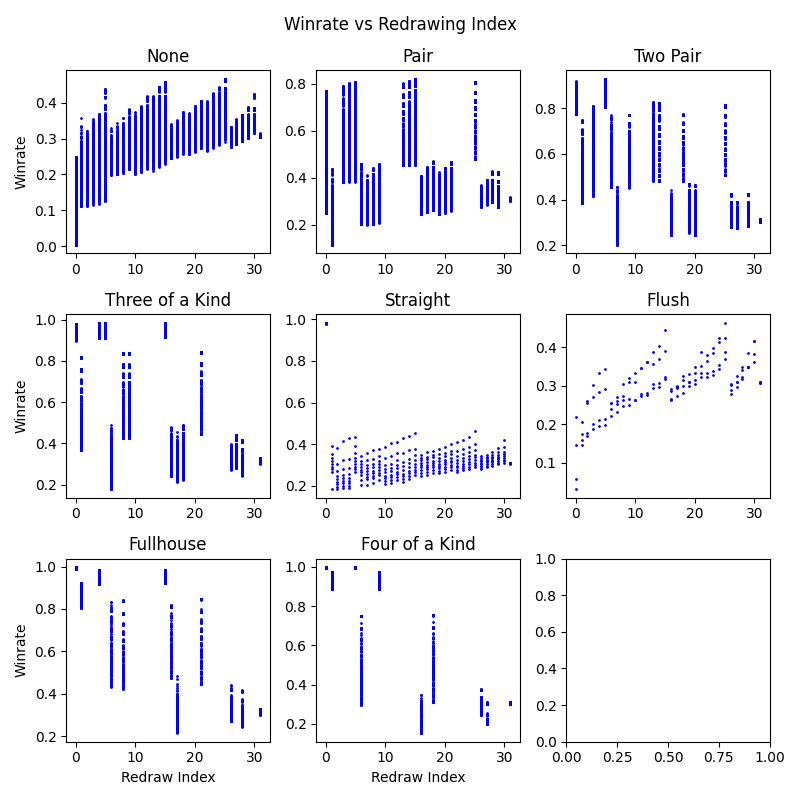

In [9]:

fig, axs = plt.subplots(3,3)
fig.set_figheight(8)
fig.set_figwidth(8)
for i in range(1,9):
    df_select = df[df["Hand Score"] == i]
    axs[math.floor((i-1)/3),(i-1)%3].plot(df_select["Redraw Index"],df_select["Winrate"],'bo',markersize=1)
    if (i-1)%3 == 0:
        axs[math.floor((i-1)/3),(i-1)%3].set_ylabel("Winrate")
    if math.floor((i-1)/3)== 2:
        axs[math.floor((i-1)/3),(i-1)%3].set_xlabel('Redraw Index')
    try:
        axs[math.floor((i-1)/3),(i-1)%3].set_title(score_test_dict[i])
    except:
        pass
fig.suptitle("Winrate vs Redrawing Index")
fig.tight_layout();

# Plotting only the choices leading to maximum winrates

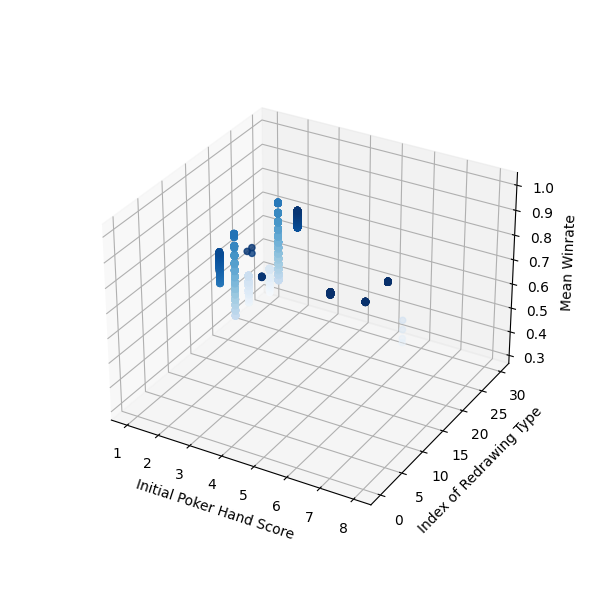

In [10]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(df_max["Hand Score"],df_max["Redraw Index"],df_max["Winrate"], c=df_max["Winrate"],cmap='Blues')
ax.set_xlabel('Initial Poker Hand Score')
ax.set_ylabel('Index of Redrawing Type')
ax.set_zlabel('Mean Winrate');

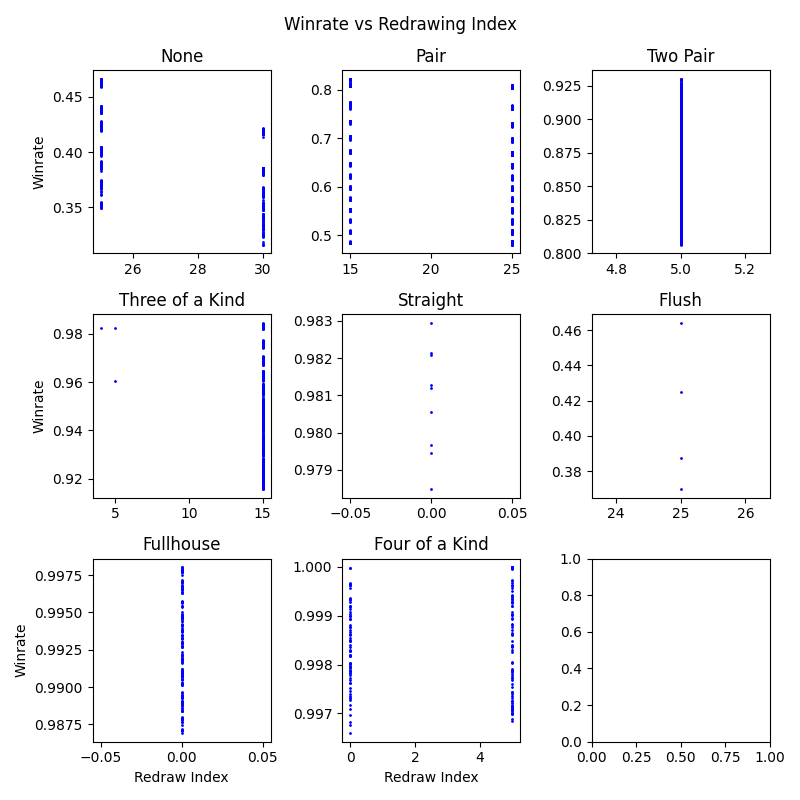

In [11]:
fig, axs = plt.subplots(3,3)
fig.set_figheight(8)
fig.set_figwidth(8)
for i in range(1,9):
    df_select_max = df_max[df_max["Hand Score"] == i]
    axs[math.floor((i-1)/3),(i-1)%3].plot(df_select_max["Redraw Index"],df_select_max["Winrate"],'bo',markersize=1)
    if (i-1)%3 == 0:
        axs[math.floor((i-1)/3),(i-1)%3].set_ylabel("Winrate")
    if math.floor((i-1)/3)== 2:
        axs[math.floor((i-1)/3),(i-1)%3].set_xlabel('Redraw Index')
    try:
        axs[math.floor((i-1)/3),(i-1)%3].set_title(score_test_dict[i])
    except:
        pass
fig.suptitle("Winrate vs Redrawing Index")
fig.tight_layout();

#### Why are there weird 3 of a kind outliers, why Singles and Pairs seemingly flip flopped over two redraws

In [12]:
#These appear to be outliers when considering the 2nd and 3rd winrate redraw choices
three_kind_df = df_max[df_max["Hand Score"] == 4]
three_kind_df[three_kind_df["Redraw Index"] != 15]

,Hand List,Hand Score,Index Kept,Value Kept,Index Remove,Value Remove,Winrate,Std,Redraw Index,Card 1,Card 2,Card 3,Card 4,Card 5
1103,"[14, 14, 14, 4, 2]",4,"[0, 1, 2, 4]","[14, 14, 14, 2]",[3],[4],0.98236,0.001072,4,14,14,14,4,2
4511,"[14, 14, 14, 5, 4]",4,"[0, 1, 2, 3]","[14, 14, 14, 5]",[4],[4],0.98240,0.001071,5,14,14,14,5,4
5985,"[11, 11, 11, 7, 6]",4,"[0, 1, 2, 3]","[11, 11, 11, 7]",[4],[6],0.96028,0.001591,5,11,11,11,7,6


## Singles Analysis

In [13]:
#Curious about the value frequency of first few cards between main redraw types
singles = df_max[df_max["Hand Score"] == 1]
#Create new columns specifying card values in hand by order
singles25 = singles[singles["Redraw Index"] == 25]
singles30 = singles[singles["Redraw Index"] == 30]
#singles30

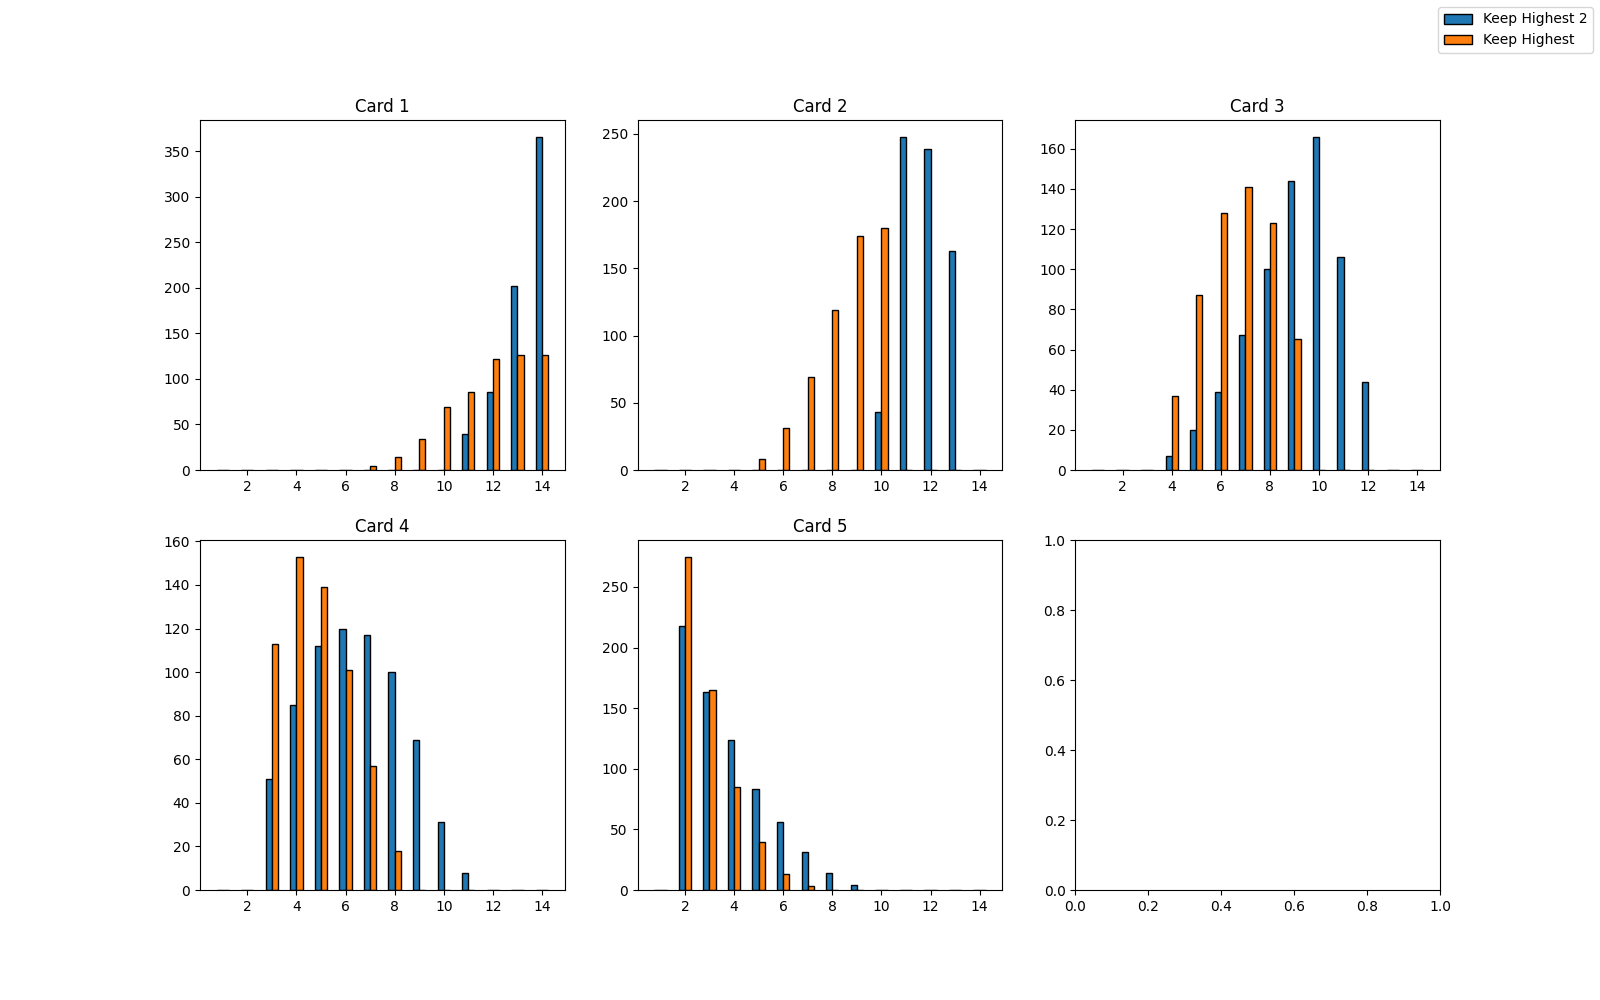

In [31]:
fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(16)
for i in range(1,6):
    s = 'Card '+str(i)
    for j in range(2):
        if j == 0:
            count = singles25[s].value_counts()
        else:
            count = singles30[s].value_counts()
            
        a = count.index
        b = list(count)
        a,b = zip(*sorted(zip(a,b)))
        x = np.arange(1,15)
        y = []
        for k in range(1,15):
            if k in a:
                y.append(b[a.index(k)])
            else:
                y.append(0)
        if j == 0:
            leg = "Keep Highest 2"
        else:
            leg = "Keep Highest"
        if i != 1:
            leg = ''
        if j == 0:
            axs[math.floor((i-1)/3),(i-1)%3].bar(x-.125,y,width = .25, edgecolor = 'black',label=leg)
        else:
            axs[math.floor((i-1)/3),(i-1)%3].bar(x+0.125,y,width = .25, edgecolor = 'black',label=leg)
            pass
    axs[math.floor((i-1)/3),(i-1)%3].set_title(s)
fig.legend()

In [15]:
plt.scatter(singles30["Card 1"],singles30["Card 2"],s=100,alpha=0.01,color='r')
plt.scatter(singles25["Card 1"],singles25["Card 2"],s=100,alpha=0.01,color='b')
plt.plot([],[],"ro",label="Keep Highest")
plt.plot([],[],"bo",label="Keep Highest 2")
plt.title("Singles: Top 2 card values vs Redraw Style")
plt.xlabel("Highest Card")
plt.ylabel("2nd Highest Card")
plt.legend()

In [16]:
#singles[singles["Card 1"] == 12][singles["Redraw Index"] == 25][singles["Card 2"] == 10]
#singles[singles["Card 1"] == 12][singles["Redraw Index"] == 30][singles["Card 2"] == 10]

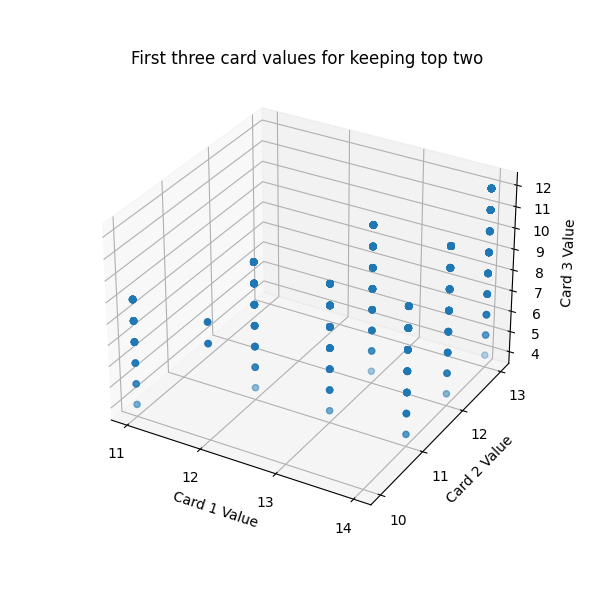

In [17]:
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(singles25["Card 1"],singles25["Card 2"],singles25["Card 3"],cmap='Blues')
ax.set_xlabel('Card 1 Value')
ax.set_ylabel('Card 2 Value')
ax.set_zlabel('Card 3 Value')
ax.set_xticks(np.arange(min(singles25["Card 1"]), max(singles25["Card 1"])+1, 1.0))
ax.set_yticks(np.arange(min(singles25["Card 2"]), max(singles25["Card 2"])+1, 1.0))
ax.set_zticks(np.arange(min(singles25["Card 3"]), max(singles25["Card 3"])+1, 1.0))
plt.title("First three card values for keeping top two");

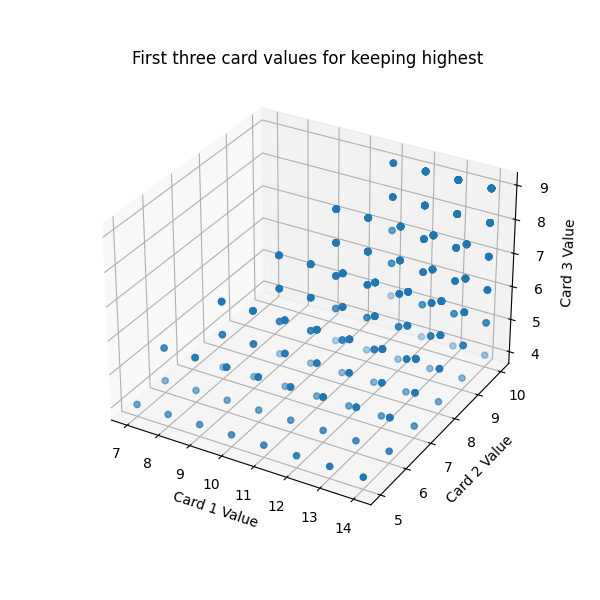

In [18]:
fig = plt.figure(figsize=(6,6), dpi=100)
#plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(singles30["Card 1"],singles30["Card 2"],singles30["Card 3"],cmap='Blues')
ax.set_xlabel('Card 1 Value')
ax.set_ylabel('Card 2 Value')
ax.set_zlabel('Card 3 Value')
plt.title("First three card values for keeping highest");

## Accounting for Standard Deviations, Only plot high confident points

In [ ]:
df_1_2 = pd.DataFrame(columns =["Hand List","Hand Score","Index Kept","Value Kept","Index Remove","Value Remove","Winrate","Std","Redraw Index"])
for ind,hand in enumerate(uniques):
    a = df[df["Hand List"] == hand].iloc[0]
    df_1_2 = df_1_2.append(a)
    a = df[df["Hand List"] == hand].iloc[1]
    df_1_2 = df_1_2.append(a)
df_1_2["Redraw Index"] = [redraw_combs[tuple(ast.literal_eval(df_1_2["Index Remove"].iloc[row]))] for row in range(len(df_1_2.index))]

In [56]:
singles_1_2 = df_1_2[df_1_2["Hand Score"] == 1]
mask = []
for i in range(int(len(singles_1_2)/2)):
    winrates = (singles_1_2["Winrate"].iloc[2*i],singles_1_2["Winrate"].iloc[2*i+1])
    stds = (singles_1_2["Std"].iloc[2*i],singles_1_2["Std"].iloc[2*i+1])
    if winrates[1] + stds[1]*1.96/2.576 >= winrates[0] - stds[0]*1.96/2.576: #Changing standard deviation to 95% confidence interval rather than 99%
        #Then the 2nd best choice winrate confidence interval collides with best choice winrate confidence interval
        #We can't be certain which is really the best
        for i in range(2):
            mask.append(False)
    else:
        mask.append(True) #Keeps top choice only
        mask.append(False) #Removes the 2nd best choice
conf_singles = singles_1_2[mask]

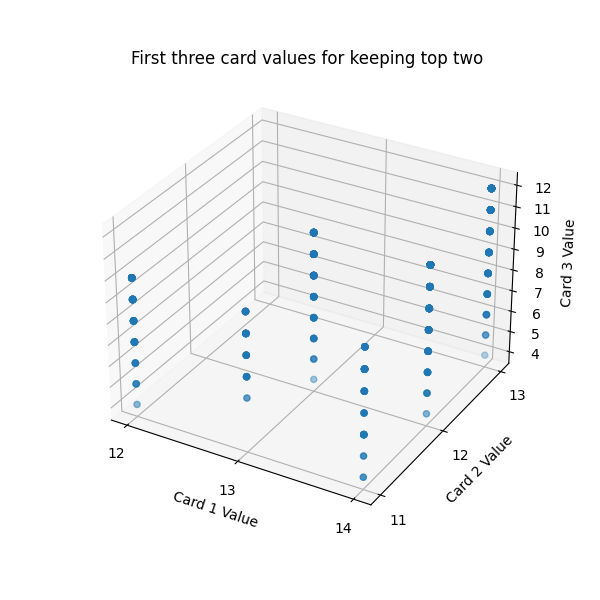

In [57]:
conf_singles25 = conf_singles[conf_singles["Redraw Index"] == 25]
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(conf_singles25["Card 1"],conf_singles25["Card 2"],conf_singles25["Card 3"],cmap='Blues')
ax.set_xlabel('Card 1 Value')
ax.set_ylabel('Card 2 Value')
ax.set_zlabel('Card 3 Value')
ax.set_xticks(np.arange(min(conf_singles25["Card 1"]), max(conf_singles25["Card 1"])+1, 1.0))
ax.set_yticks(np.arange(min(conf_singles25["Card 2"]), max(conf_singles25["Card 2"])+1, 1.0))
ax.set_zticks(np.arange(min(conf_singles25["Card 3"]), max(conf_singles25["Card 3"])+1, 1.0))
plt.title("First three card values for keeping top two");

C:\Users\Toby\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


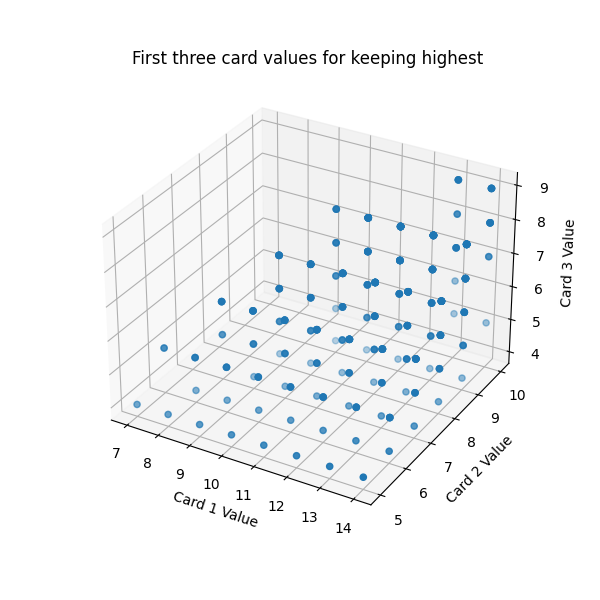

In [58]:
conf_singles30 = conf_singles[conf_singles["Redraw Index"] == 30]
fig = plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(conf_singles30["Card 1"],conf_singles30["Card 2"],conf_singles30["Card 3"],cmap='Blues')
ax.set_xlabel('Card 1 Value')
ax.set_ylabel('Card 2 Value')
ax.set_zlabel('Card 3 Value')
ax.set_xticks(np.arange(min(conf_singles30["Card 1"]), max(conf_singles30["Card 1"])+1, 1.0))
ax.set_yticks(np.arange(min(conf_singles30["Card 2"]), max(conf_singles30["Card 2"])+1, 1.0))
ax.set_zticks(np.arange(min(conf_singles30["Card 3"]), max(conf_singles30["Card 3"])+1, 1.0))
plt.title("First three card values for keeping highest");

# Pairs Analysis

In [19]:
#Curious about the value frequency of first few cards between main redraw types
pairs = df_max[df_max["Hand Score"] == 2]
#Create new columns specifying card values in hand by order
hand_card_values = [[],[],[],[],[]]
for i in range(len(pairs)):
    aa = ast.literal_eval(pairs["Hand List"].iloc[i])
    for i in range(5):
        hand_card_values[i].append(aa[i])
for i in range(5):
    s = "Card "+str(i+1)
    pairs[s] = hand_card_values[i]

pairs25 = pairs[pairs["Redraw Index"] == 25]
pairs15 = pairs[pairs["Redraw Index"] == 15]

C:\Users\Toby\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [20]:
pairs15

,Hand List,Hand Score,Index Kept,Value Kept,Index Remove,Value Remove,Winrate,Std,Redraw Index,Card 1,Card 2,Card 3,Card 4,Card 5
122,"[2, 2, 14, 5, 3]",2,"[0, 1, 2]","[2, 2, 14]","[3, 4]","[5, 3]",0.48338,0.004071,15,2,2,14,5,3
131,"[2, 2, 14, 6, 3]",2,"[0, 1, 2]","[2, 2, 14]","[3, 4]","[6, 3]",0.48385,0.004071,15,2,2,14,6,3
212,"[2, 2, 14, 8, 4]",2,"[0, 1, 2]","[2, 2, 14]","[3, 4]","[8, 4]",0.48538,0.004071,15,2,2,14,8,4
223,"[2, 2, 14, 10, 4]",2,"[0, 1, 2]","[2, 2, 14]","[3, 4]","[10, 4]",0.48393,0.004071,15,2,2,14,10,4
227,"[2, 2, 14, 11, 4]",2,"[0, 1, 2]","[2, 2, 14]","[3, 4]","[11, 4]",0.48447,0.004071,15,2,2,14,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6153,"[10, 10, 14, 11, 6]",2,"[0, 1, 2]","[10, 10, 14]","[3, 4]","[11, 6]",0.67209,0.003824,15,10,10,14,11,6
6156,"[10, 10, 14, 12, 6]",2,"[0, 1, 2]","[10, 10, 14]","[3, 4]","[12, 6]",0.67086,0.003828,15,10,10,14,12,6
6158,"[10, 10, 14, 13, 6]",2,"[0, 1, 2]","[10, 10, 14]","[3, 4]","[13, 6]",0.67362,0.003820,15,10,10,14,13,6
6163,"[11, 11, 14, 10, 6]",2,"[0, 1, 2]","[11, 11, 14]","[3, 4]","[10, 6]",0.70163,0.003727,15,11,11,14,10,6


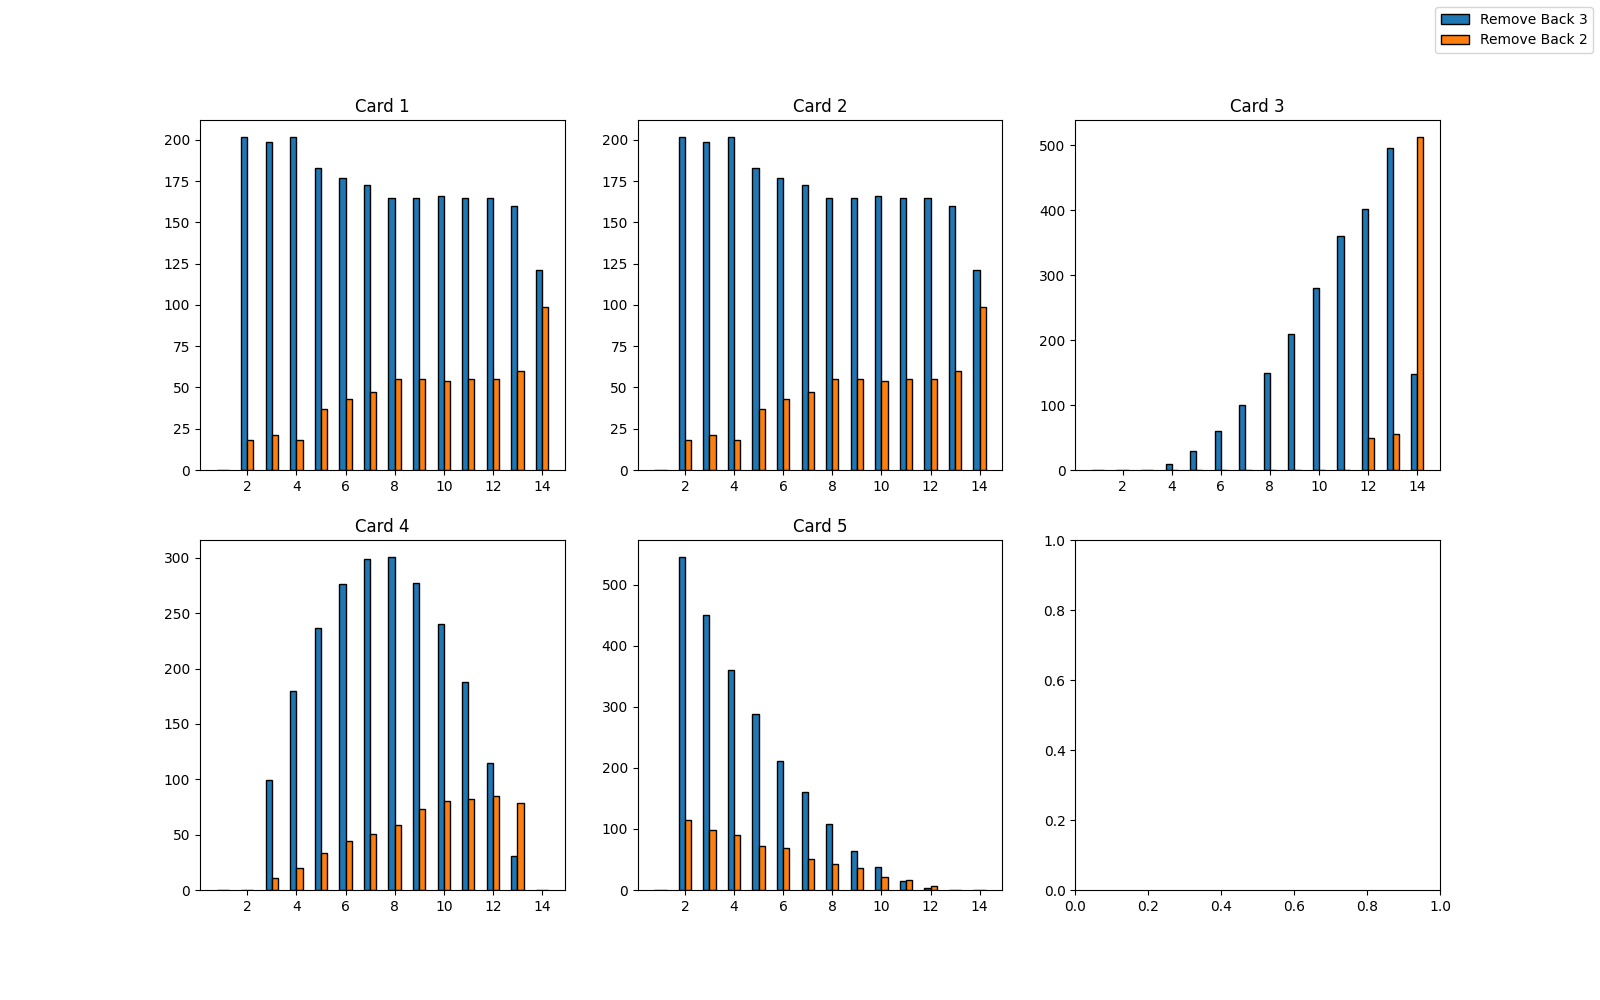

In [21]:
fig, axs = plt.subplots(2,3)
fig.set_figheight(10)
fig.set_figwidth(16)
for i in range(1,6):
    s = 'Card '+str(i)
    for j in range(2):
        if j == 0:
            count = pairs25[s].value_counts()
        else:
            count = pairs15[s].value_counts()
            
        a = count.index
        b = list(count)
        a,b = zip(*sorted(zip(a,b)))
        x = np.arange(1,15)
        y = []
        for k in range(1,15):
            if k in a:
                y.append(b[a.index(k)])
            else:
                y.append(0)
        if j == 0:
            leg = "Remove Back 3"
        else:
            leg = "Remove Back 2"
        if i != 1:
            leg = ''
        if j == 0:
            axs[math.floor((i-1)/3),(i-1)%3].bar(x-.125,y,width = .25, edgecolor = 'black',label=leg)
        else:
            axs[math.floor((i-1)/3),(i-1)%3].bar(x+0.125,y,width = .25, edgecolor = 'black',label=leg)
            pass
    axs[math.floor((i-1)/3),(i-1)%3].set_title(s)
fig.legend()

# Same as before but a specific pair value

In [22]:
plt.scatter(pairs15["Card 3"],pairs15["Card 4"],s=100,alpha=0.02,color='r')
plt.scatter(pairs25["Card 3"],pairs25["Card 4"],s=100,alpha=0.02,color='b')
plt.plot([],[],"ro",label="Remove Back 2")
plt.plot([],[],"bo",label="Remove Back 3")
plt.title("Pairs: Top 2 card values vs Redraw Style")
plt.xlabel("Highest Spare")
plt.ylabel("2nd Highest Spare")
plt.legend()

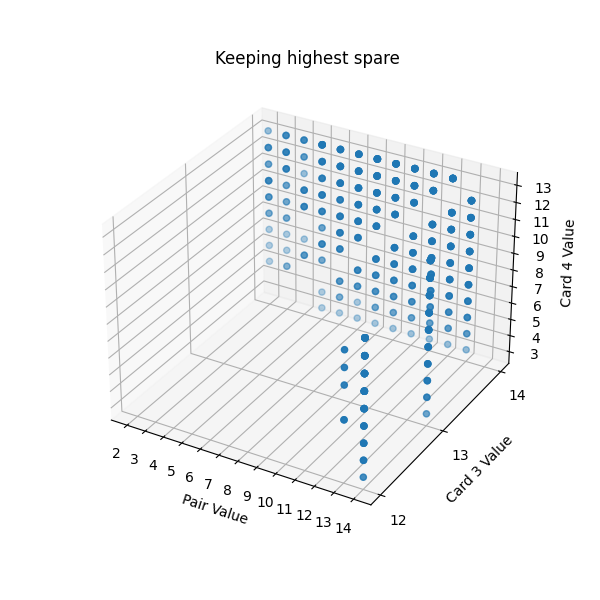

In [23]:
fig = plt.figure(figsize=(6,6), dpi=100)
#plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(pairs15["Card 2"],pairs15["Card 3"],pairs15["Card 4"],cmap='Blues')
ax.set_xlabel('Pair Value')
ax.set_ylabel('Card 3 Value')
ax.set_zlabel('Card 4 Value')
ax.set_xticks(np.arange(min(pairs15["Card 2"]), max(pairs15["Card 2"])+1, 1.0))
ax.set_yticks(np.arange(min(pairs15["Card 3"]), max(pairs15["Card 3"])+1, 1.0))
ax.set_zticks(np.arange(min(pairs15["Card 4"]), max(pairs15["Card 4"])+1, 1.0))
plt.title("Keeping highest spare");

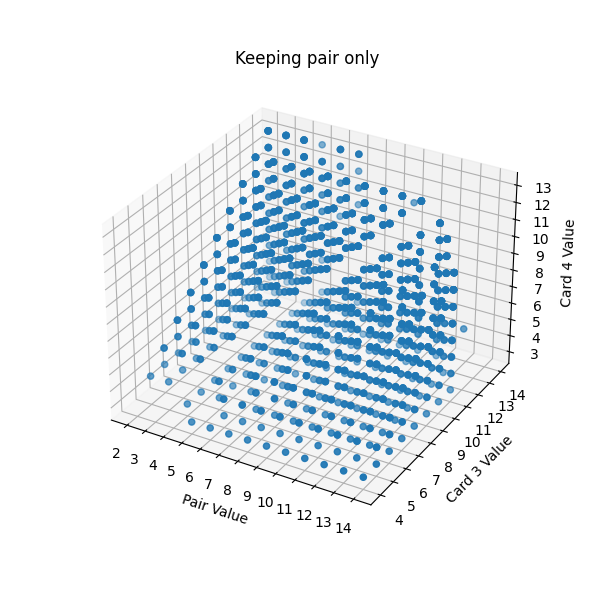

In [24]:
fig = plt.figure(figsize=(6,6), dpi=100)
#plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(pairs25["Card 2"],pairs25["Card 3"],pairs25["Card 4"],cmap='Blues')
ax.set_xlabel('Pair Value')
ax.set_ylabel('Card 3 Value')
ax.set_zlabel('Card 4 Value')
ax.set_xticks(np.arange(min(pairs25["Card 2"]), max(pairs25["Card 2"])+1, 1.0))
ax.set_yticks(np.arange(min(pairs25["Card 3"]), max(pairs25["Card 3"])+1, 1.0))
ax.set_zticks(np.arange(min(pairs25["Card 4"]), max(pairs25["Card 4"])+1, 1.0))
plt.title("Keeping pair only");

# Providing Text Illustration of Top Redrawing Techniques Used Per Hand Type

In [25]:
for hand_score in range(1,9):
    if hand_score != 6:
        print("")
        print("Best Techniques for {0}".format(score_test_dict[hand_score]))
        print("")
    card_types = card_label_dict[hand_score]
    for redraw_index in pd.unique(df_max[df_max["Hand Score"] == hand_score]["Redraw Index"]):
        print("    Redraw Technique {0}.".format(redraw_index))
        if redraw_combs_rev[redraw_index] == ():
            print("         Keeping entire hand.")
        for index in redraw_combs_rev[redraw_index]:
            #These are the specific hand card indices selected for removal by best redrawing technique
            print("         Removing {0} from hand.".format(card_types[index]))


Best Techniques for None

    Redraw Technique 30.
         Removing 2nd Highest from hand.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
         Removing Lowest from hand.
    Redraw Technique 25.
         Removing 3rd Highest from hand.
         Removing 4th Highest from hand.
         Removing Lowest from hand.

Best Techniques for Pair

    Redraw Technique 25.
         Removing High Card from hand.
         Removing 2nd Highest from hand.
         Removing Lowest from hand.
    Redraw Technique 15.
         Removing 2nd Highest from hand.
         Removing Lowest from hand.

Best Techniques for Two Pair

    Redraw Technique 5.
         Removing High Card from hand.

Best Techniques for Three of a Kind

    Redraw Technique 15.
         Removing High Card from hand.
         Removing Lowest from hand.
    Redraw Technique 4.
         Removing High Card from hand.
    Redraw Technique 5.
         Removing Lowest from hand.

Best Techniques for 

## Plotting only highly confident points

In [53]:
bb = df_1_2[df_1_2["Hand Score"] == 2]
mask = []
for i in range(int(len(bb)/2)):
    winrates = (bb["Winrate"].iloc[2*i],bb["Winrate"].iloc[2*i+1])
    stds = (bb["Std"].iloc[2*i],bb["Std"].iloc[2*i+1])
    if winrates[1] + stds[1]*1.96/2.576 >= winrates[0] - stds[0]*1.96/2.576: #Changing standard deviation to 95% confidence interval rather than 99%
        #Then the 2nd best choice winrate confidence interval collides with best choice winrate confidence interval
        #We can't be certain which is really the best
        for i in range(2):
            mask.append(False)
    else:
        mask.append(True) #Keeps top choice only
        mask.append(False) #Removes the 2nd best choice
bbb = bb[mask]

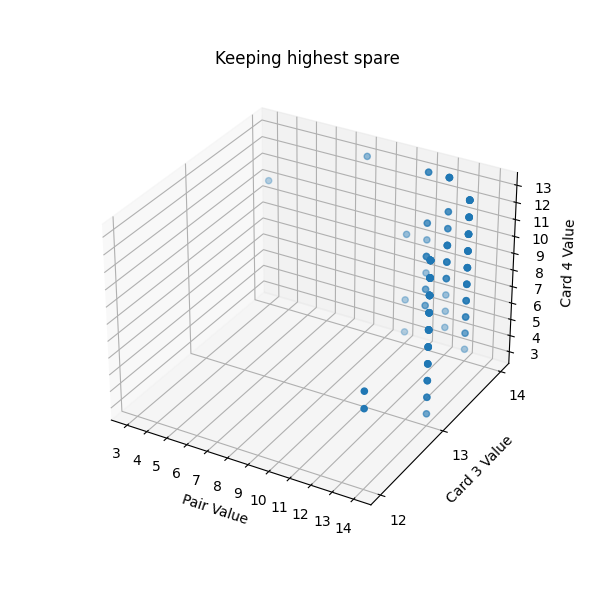

In [54]:
bbbpairs15 = bbb[bbb["Redraw Index"] == 15]
fig = plt.figure(figsize=(6,6), dpi=100)
#plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(bbbpairs15["Card 2"],bbbpairs15["Card 3"],bbbpairs15["Card 4"],cmap='Blues')
ax.set_xlabel('Pair Value')
ax.set_ylabel('Card 3 Value')
ax.set_zlabel('Card 4 Value')
ax.set_xticks(np.arange(min(bbbpairs15["Card 2"]), max(bbbpairs15["Card 2"])+1, 1.0))
ax.set_yticks(np.arange(min(bbbpairs15["Card 3"]), max(bbbpairs15["Card 3"])+1, 1.0))
ax.set_zticks(np.arange(min(bbbpairs15["Card 4"]), max(bbbpairs15["Card 4"])+1, 1.0))
plt.title("Keeping highest spare");

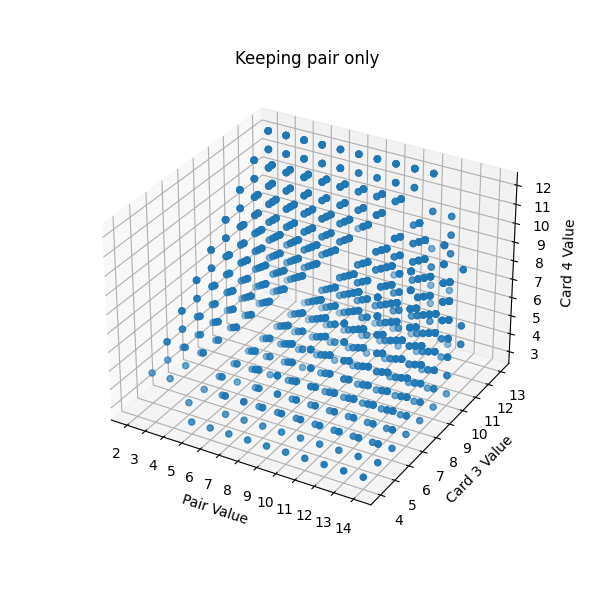

In [52]:
bbbpairs25 = bbb[bbb["Redraw Index"] == 25]
fig = plt.figure(figsize=(6,6), dpi=100)
#plt.figure(figsize=(6,6), dpi=100)
ax = plt.axes(projection='3d')
ax.scatter3D(bbbpairs25["Card 2"],bbbpairs25["Card 3"],bbbpairs25["Card 4"],cmap='Blues')
ax.set_xlabel('Pair Value')
ax.set_ylabel('Card 3 Value')
ax.set_zlabel('Card 4 Value')
ax.set_xticks(np.arange(min(bbbpairs25["Card 2"]), max(bbbpairs25["Card 2"])+1, 1.0))
ax.set_yticks(np.arange(min(bbbpairs25["Card 3"]), max(bbbpairs25["Card 3"])+1, 1.0))
ax.set_zticks(np.arange(min(bbbpairs25["Card 4"]), max(bbbpairs25["Card 4"])+1, 1.0))
plt.title("Keeping pair only");